# Import

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 

import seaborn as sns

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
 
plt.style.use("seaborn")


# Data Load

In [3]:
df = pd.read_csv('../Output/한라_predict.csv',encoding='cp949')
df

,file_name,name,height,weight,satba_time,play_time,rest_time,status,skill,move,game_num,round,predict
0,한라_8_1_1_0,이국희,183,106,51,6,0,0,1,4798.979413,1,8,0.475826
1,한라_8_1_1_0,김무호,183,107,51,6,0,1,1,4798.979413,1,8,0.478499
2,한라_8_1_2_0,이국희,183,106,99,12,60,0,2,11549.262830,2,8,1.287950
3,한라_8_1_2_0,김무호,183,107,99,12,60,0,2,11549.262830,2,8,1.290622
4,한라_8_2_1_0,유정훈,190,105,62,3,0,0,1,3691.158295,1,8,0.325533
5,한라_8_2_1_0,최성환,183,107,62,3,0,1,1,3691.158295,1,8,0.396428
6,한라_8_2_2_0,유정훈,190,105,112,9,60,0,4,8455.673135,2,8,1.173440
7,한라_8_2_2_0,최성환,183,107,112,9,60,0,4,8455.673135,2,8,1.244335
8,한라_8_3_1_0,박동환,193,105,50,9,0,0,3,5164.752321,1,8,0.626998
9,한라_8_3_1_0,박민교,182,105,50,9,0,1,3,5164.752321,1,8,0.730005


# 우승자 VS 준우승자 체력 비교

In [4]:
win_df = df.query("name == '박민교'").reset_index(drop=True)
semi_win_df = df.query("name == '최성환'").reset_index(drop=True)

In [5]:
#nan_rows = pd.DataFrame(np.nan, columns=win_df.columns, index=range(3))

# 데이터프레임 앞에 NaN 행 추가
#win_df = pd.concat([nan_rows, win_df], ignore_index=True).reset_index(drop=True)
win_df

,file_name,name,height,weight,satba_time,play_time,rest_time,status,skill,move,game_num,round,predict
0,한라_8_3_1_0,박민교,182,105,50,9,0,1,3,5164.752321,1,8,0.730005
1,한라_8_3_2_0,박민교,182,105,107,16,60,0,6,10857.826810,2,8,1.671610
2,한라_4_2_1_0,박민교,182,105,159,17,1573,0,7,15724.152650,3,4,2.862029
3,한라_4_2_2_0,박민교,182,105,207,24,1633,1,9,22210.672380,4,4,3.757309
4,한라_4_2_3_0,박민교,182,105,260,28,1693,1,11,27090.567590,5,4,4.515349
5,한라_2_2_1_0,박민교,182,105,314,30,2786,1,13,31534.301680,5,2,5.632531
6,한라_2_2_2_0,박민교,182,105,362,90,2846,0,21,37725.464880,6,2,6.951534
7,한라_2_2_2_1,박민교,182,105,404,95,2846,0,24,41845.309470,7,2,7.716226
8,한라_2_2_3_0,박민교,182,105,448,98,2966,0,26,46936.192260,8,2,8.504613
9,한라_2_2_4_0,박민교,182,105,499,107,3026,1,29,50993.414910,9,2,9.272354


In [6]:
semi_win_df

,file_name,name,height,weight,satba_time,play_time,rest_time,status,skill,move,game_num,round,predict
0,한라_8_2_1_0,최성환,183,107,62,3,0,1,1,3691.158295,1,8,0.396428
1,한라_8_2_2_0,최성환,183,107,112,9,60,0,4,8455.673135,2,8,1.244335
2,한라_4_1_1_0,최성환,183,107,199,18,1229,1,7,12776.050160,3,4,2.522487
3,한라_4_1_2_0,최성환,183,107,261,28,1289,0,11,17193.181740,4,4,3.446344
4,한라_4_1_3_0,최성환,183,107,309,33,1349,0,12,20950.998880,5,4,3.972730
5,한라_2_2_1_0,최성환,183,107,363,35,3000,0,14,25394.732970,6,2,5.237698
6,한라_2_2_2_0,최성환,183,107,411,95,3060,0,22,31585.896160,7,2,6.556701
7,한라_2_2_2_1,최성환,183,107,453,100,3060,1,25,35705.740760,8,2,7.321393
8,한라_2_2_3_0,최성환,183,107,497,103,3180,1,27,40796.623540,9,2,8.109781
9,한라_2_2_4_0,최성환,183,107,548,112,3240,0,30,44853.846200,10,2,8.877522


In [7]:
win_df['predict'] = 100-win_df['predict']*6
semi_win_df['predict'] = 100-semi_win_df['predict']*6

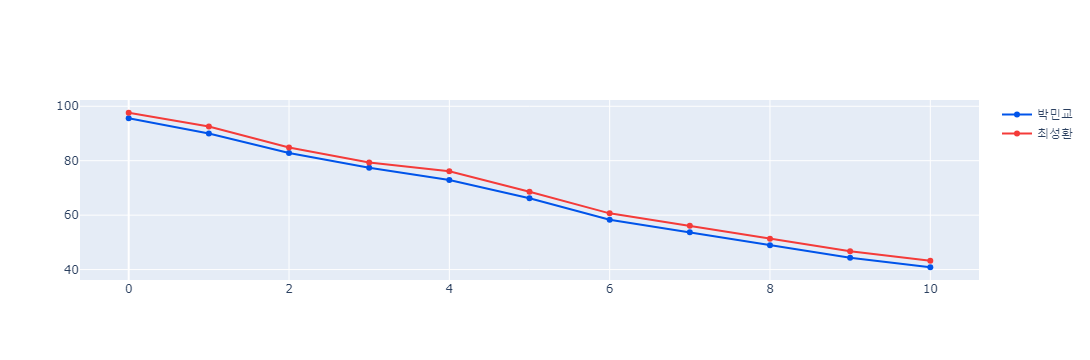

In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=semi_win_df.index, y=win_df['predict'],
                    mode='lines+markers', # Line plot만 그리기
                    line=dict(color = '#0054EA'),
                    name='박민교'))

fig.add_trace(go.Scatter(x=semi_win_df.index, y=semi_win_df['predict'],
                    mode='lines+markers', # Line plot만 그리기
                    line=dict(color = '#F43B39'),
                    name='최성환'))

fig.show()

# 우승자 VS 준우승자 이동거리 비교

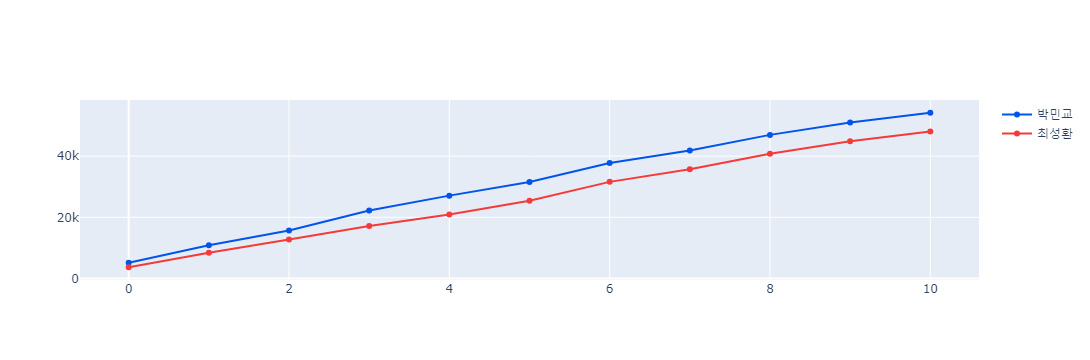

In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=semi_win_df.index, y=win_df['move'],
                    mode='lines+markers', # Line plot만 그리기
                    line=dict(color = '#0054EA'),
                    name='박민교'))

fig.add_trace(go.Scatter(x=semi_win_df.index, y=semi_win_df['move'],
                    mode='lines+markers', # Line plot만 그리기
                    line=dict(color = '#F43B39'),
                    name='최성환'))

fig.show()

# 우승자 VS 준우승자 특징 비교

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["satba_time","play_time","rest_time","skill","move",'predict']])
scaler_df = df.copy()
scaler_df[["satba_time","play_time","rest_time","skill","move",'predict']] = scaled_data
scaler_df

,file_name,name,height,weight,satba_time,play_time,rest_time,status,skill,move,game_num,round,predict
0,한라_8_1_1_0,이국희,183,106,-1.194022,-0.827818,-1.172390,0,-1.110129,-1.134838,1,8,-1.167588
1,한라_8_1_1_0,김무호,183,107,-1.194022,-0.827818,-1.172390,1,-1.110129,-1.134838,1,8,-1.166668
2,한라_8_1_2_0,이국희,183,106,-0.894346,-0.668414,-1.123806,0,-1.002776,-0.676107,2,8,-0.887810
3,한라_8_1_2_0,김무호,183,107,-0.894346,-0.668414,-1.123806,0,-1.002776,-0.676107,2,8,-0.886889
4,한라_8_2_1_0,유정훈,190,105,-1.125346,-0.907521,-1.172390,0,-1.110129,-1.210122,1,8,-1.219365
5,한라_8_2_1_0,최성환,183,107,-1.125346,-0.907521,-1.172390,1,-1.110129,-1.210122,1,8,-1.194941
6,한라_8_2_2_0,유정훈,190,105,-0.813184,-0.748116,-1.123806,0,-0.788070,-0.886339,2,8,-0.927259
7,한라_8_2_2_0,최성환,183,107,-0.813184,-0.748116,-1.123806,0,-0.788070,-0.886339,2,8,-0.902835
8,한라_8_3_1_0,박동환,193,105,-1.200265,-0.748116,-1.172390,0,-0.895423,-1.109981,1,8,-1.115509
9,한라_8_3_1_0,박민교,182,105,-1.200265,-0.748116,-1.172390,1,-0.895423,-1.109981,1,8,-1.080023


In [14]:
df_t = scaler_df[["satba_time","play_time","rest_time","skill","move",'predict']].iloc[-2:,:].transpose()
df_t.columns = ['박민교','최성환']
df_t

,박민교,최성환
satba_time,2.177334,1.871415
play_time,2.174306,2.041469
rest_time,1.548286,1.375005
skill,2.217819,2.110466
move,1.802776,2.220004
predict,1.928119,2.064140


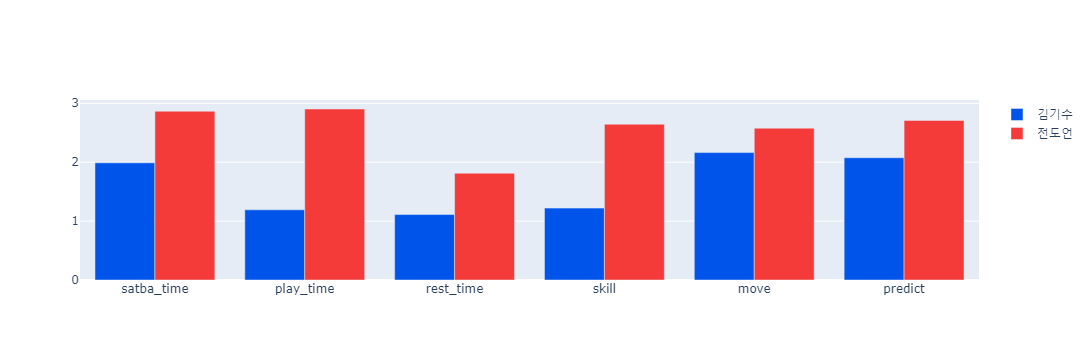

In [11]:
fig = go.Figure()

fig.add_trace(
    go.Bar(x=df_t.index, y=df_t['김기수'], name="김기수",
          marker=dict(color = '#0054EA'))
)

fig.add_trace(
    go.Bar(x=df_t.index, y=df_t['전도언'], name="전도언",
          marker=dict(color = '#F43B39'))
)

fig.show()

# 우승자 VS 준우승자 체력과 특징 비교

## 우승자(김기수)

In [12]:
df_win = scaler_df.query('name == "김기수"').reset_index(drop=True)[["satba_time","play_time","rest_time","skill","move","predict"]]
df_win = df_win.diff().fillna(0)
df_win

,satba_time,play_time,rest_time,skill,move,predict
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.764815,0.064182,0.042060,0.258904,0.512152,0.544435
2,0.392016,0.449271,1.164366,0.388357,0.492261,0.566176
3,0.230597,0.042788,0.042060,0.258904,0.251106,0.229525
4,0.518844,0.064182,0.756382,0.129452,0.473098,0.547640
5,0.272874,0.278120,0.042060,0.517809,0.303383,0.299160
6,0.422762,1.283630,0.042060,0.647261,0.651892,0.491564
7,0.203694,0.042788,0.000000,0.129452,0.325414,0.231980


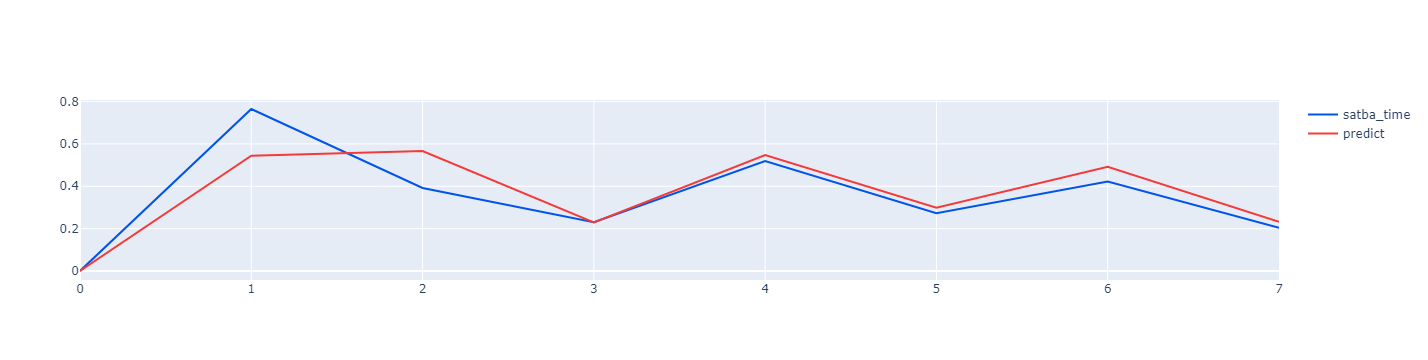

In [13]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['satba_time'],
                    line=dict(color = '#0054EA'),
                    mode='lines', # Line plot만 그리기
                    name='satba_time'))

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['predict'],
                    line=dict(color = '#F43B39'),
                    mode='lines', # Line plot만 그리기
                    name='predict'))

fig.show()

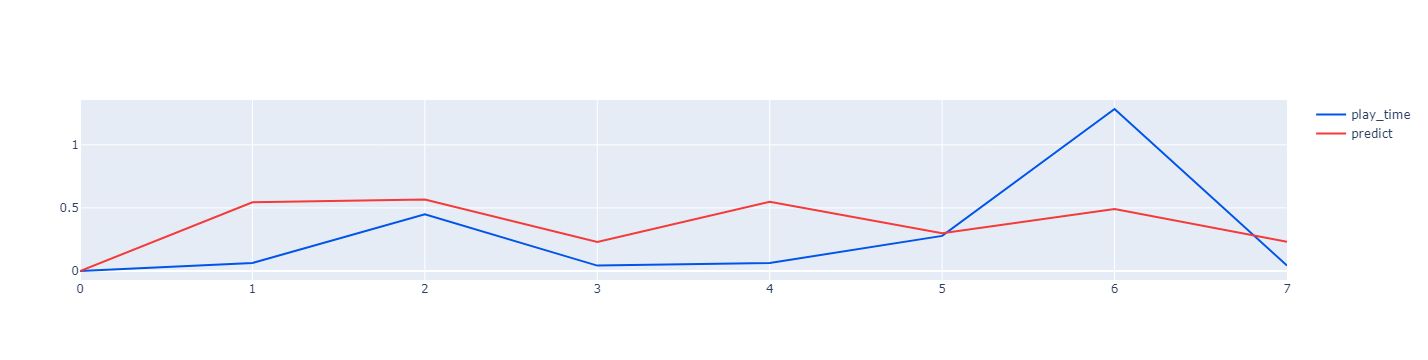

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['play_time'],
                    line=dict(color = '#0054EA'),
                    mode='lines', # Line plot만 그리기
                    name='play_time'))

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['predict'],
                    line=dict(color = '#F43B39'),
                    mode='lines', # Line plot만 그리기
                    name='predict'))

fig.show()

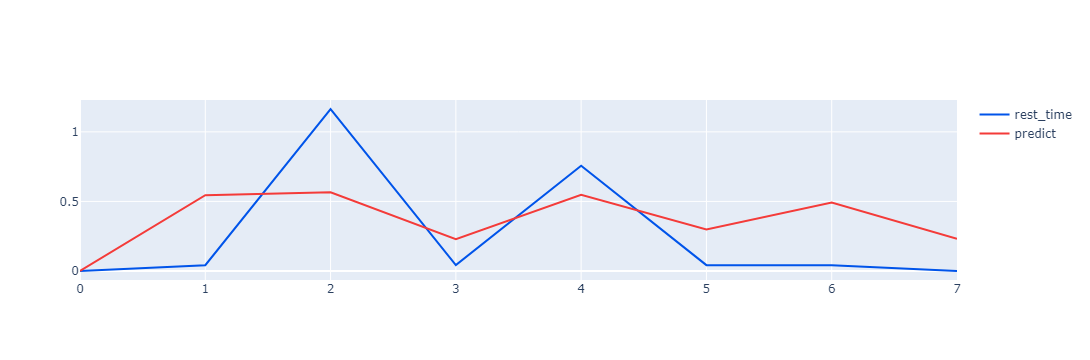

In [15]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['rest_time'],
                    line=dict(color = '#0054EA'),
                    mode='lines', # Line plot만 그리기
                    name='rest_time'))

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['predict'],
                    line=dict(color = '#F43B39'),
                    mode='lines', # Line plot만 그리기
                    name='predict'))

fig.show()

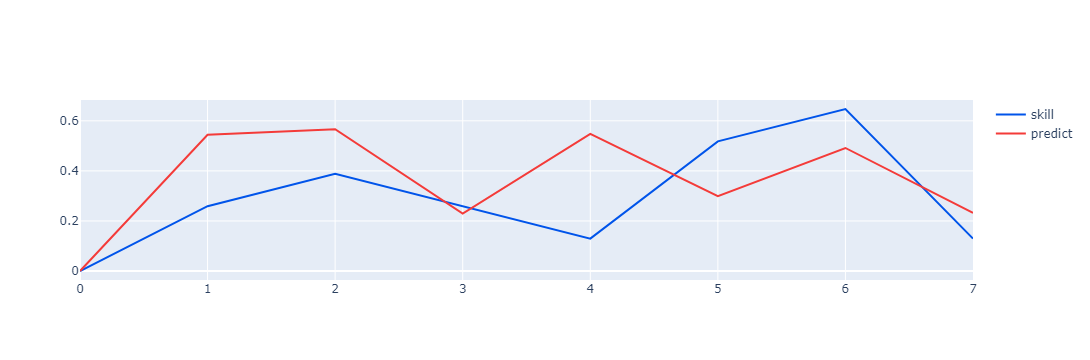

In [16]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['skill'],
                    line=dict(color = '#0054EA'),
                    mode='lines', # Line plot만 그리기
                    name='skill'))

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['predict'],
                    line=dict(color = '#F43B39'),
                    mode='lines', # Line plot만 그리기
                    name='predict'))

fig.show()

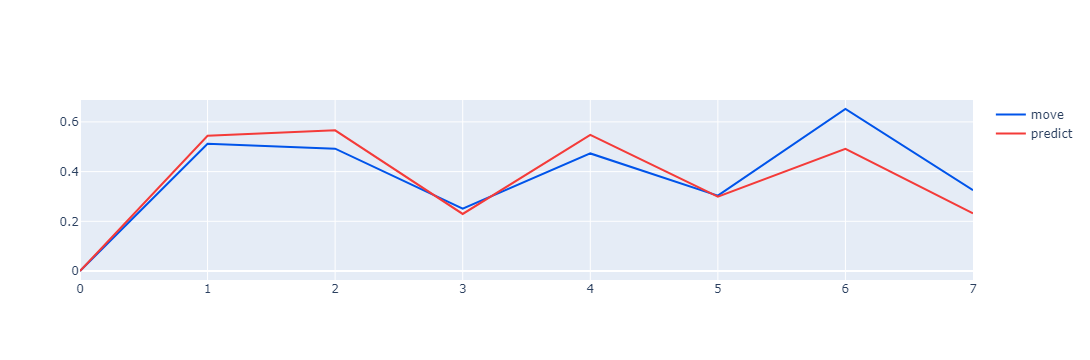

In [17]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['move'],
                    line=dict(color = '#0054EA'),
                    mode='lines', # Line plot만 그리기
                    name='move'))

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['predict'],
                    line=dict(color = '#F43B39'),
                    mode='lines', # Line plot만 그리기
                    name='predict'))

fig.show()

## 준우승자(전도언)

In [18]:
df_win = scaler_df.query('name == "전도언"').reset_index(drop=True)[["satba_time","play_time","rest_time","skill","move","predict"]]
df_win = df_win.diff().fillna(0)
df_win

,satba_time,play_time,rest_time,skill,move,predict
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.549590,0.106969,0.042060,0.388357,0.500435,0.474049
2,0.426605,0.021394,1.495239,0.129452,0.162319,0.251028
3,0.276717,0.064182,0.042060,0.258904,0.401544,0.309189
4,0.430448,1.283630,0.785123,0.517809,0.361837,0.533458
5,0.165261,0.641815,0.000000,0.647261,0.312477,0.271033
6,0.245971,0.021394,0.042060,0.258904,0.282950,0.249326
7,0.518844,0.064182,0.299328,0.129452,0.473098,0.561799
8,0.272874,0.278120,0.042060,0.517809,0.303383,0.299160
9,0.653359,1.283630,0.042060,0.647261,0.651892,0.581028


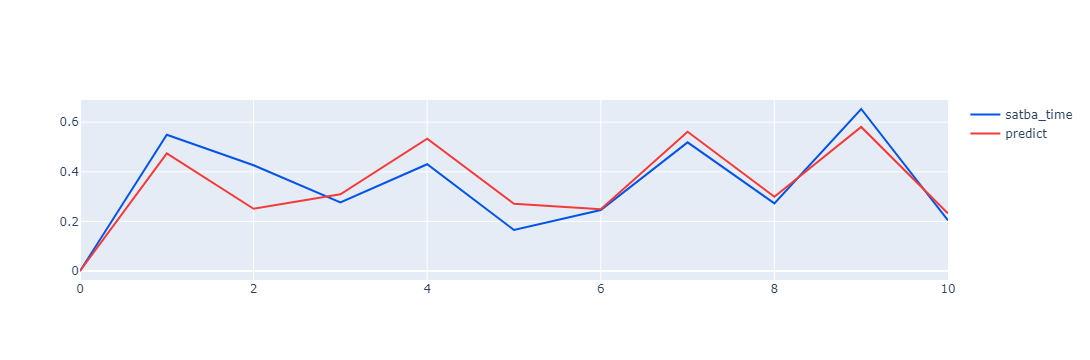

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['satba_time'],
                    line=dict(color = '#0054EA'),
                    mode='lines', # Line plot만 그리기
                    name='satba_time'))

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['predict'],
                    line=dict(color = '#F43B39'),
                    mode='lines', # Line plot만 그리기
                    name='predict'))

fig.show()

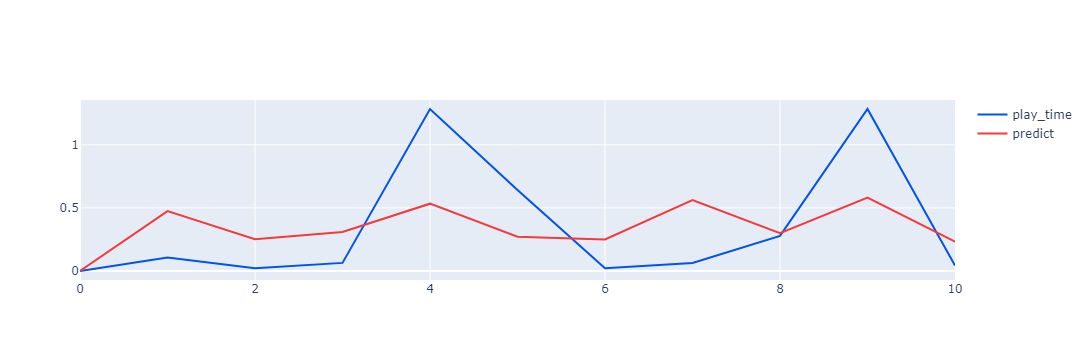

In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['play_time'],
                    line=dict(color = '#0054EA'),
                    mode='lines', # Line plot만 그리기
                    name='play_time'))

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['predict'],
                    line=dict(color = '#F43B39'),
                    mode='lines', # Line plot만 그리기
                    name='predict'))

fig.show()

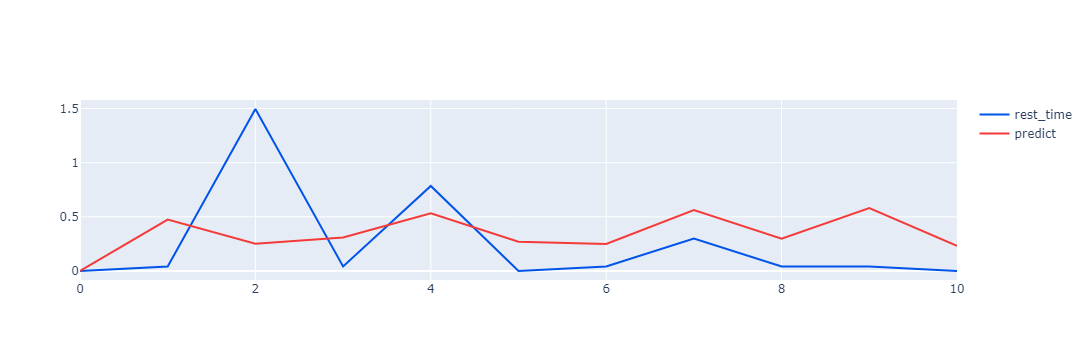

In [21]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['rest_time'],
                    line=dict(color = '#0054EA'),
                    mode='lines', # Line plot만 그리기
                    name='rest_time'))

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['predict'],
                    line=dict(color = '#F43B39'),
                    mode='lines', # Line plot만 그리기
                    name='predict'))

fig.show()

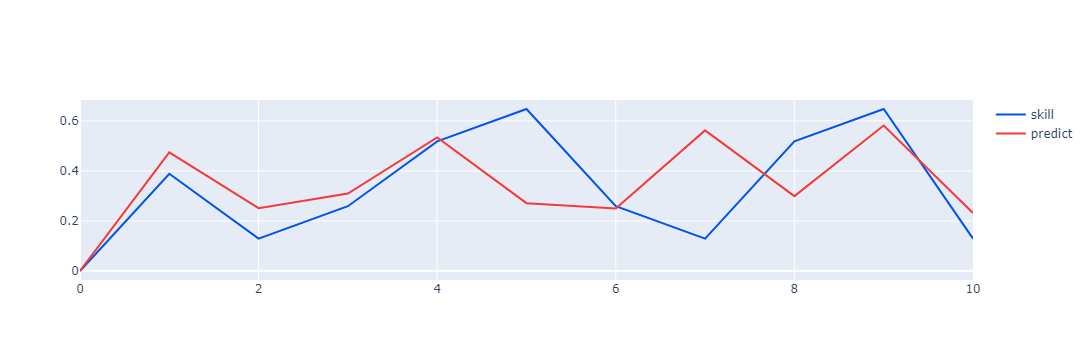

In [22]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['skill'],
                     line=dict(color = '#0054EA'),
                    mode='lines', # Line plot만 그리기
                    name='skill'))

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['predict'],
                    line=dict(color = '#F43B39'),
                    mode='lines', # Line plot만 그리기
                    name='predict'))

fig.show()

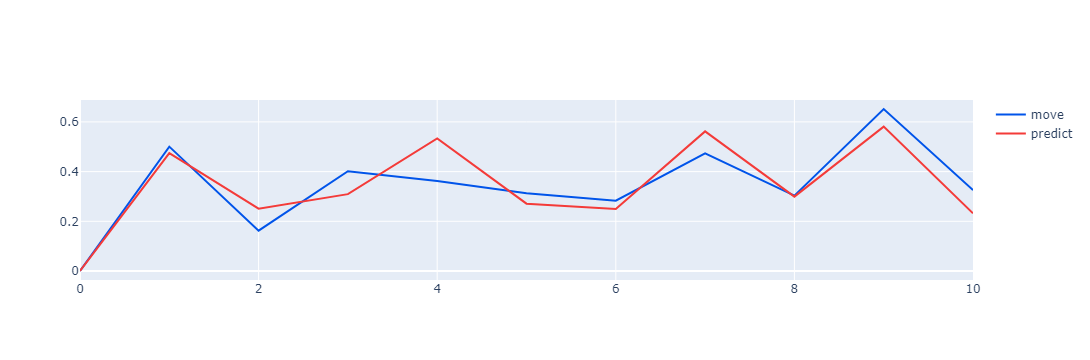

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['move'],
                    line=dict(color = '#0054EA'),
                    mode='lines', # Line plot만 그리기
                    name='move'))

fig.add_trace(go.Scatter(x=df_win.index, y=df_win['predict'],
                    line=dict(color = '#F43B39'),
                    mode='lines', # Line plot만 그리기
                    name='predict'))

fig.show()

# 선수별 판당 데이터 생성

In [15]:
pred = pd.read_csv('../Output/한라_predict.csv', encoding = 'cp949').drop('status',axis = 1);pred.head()

,file_name,name,height,weight,satba_time,play_time,rest_time,skill,move,game_num,round,predict
0,한라_8_1_1_0,이국희,183,106,51,6,0,1,4798.979413,1,8,0.475826
1,한라_8_1_1_0,김무호,183,107,51,6,0,1,4798.979413,1,8,0.478499
2,한라_8_1_2_0,이국희,183,106,99,12,60,2,11549.262830,2,8,1.287950
3,한라_8_1_2_0,김무호,183,107,99,12,60,2,11549.262830,2,8,1.290622
4,한라_8_2_1_0,유정훈,190,105,62,3,0,1,3691.158295,1,8,0.325533


In [16]:
pred['stamina'] = pred.predict*6

In [17]:
from tqdm import tqdm
data = pd.DataFrame()
for i in tqdm(list(set(pred.name))):
    temp = pred.query(f'name == "{i}"')

    temp_diff = temp.iloc[:,2:].diff(axis=0)
    temp_diff.iloc[0] = temp.iloc[0,2:]
    temp[['satba_time','play_time','rest_time','skill','move','predict','stamina']] = temp_diff[['satba_time','play_time','rest_time','skill','move','predict','stamina']]
    data = pd.concat([data,temp])

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\pc\AppData\Local\Temp\ipykernel_8012\143210440.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pc\AppData\Local\Temp\ipykernel_8012\143210440.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pc\AppData\Local\Temp\ipykernel_8012\143210440.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [18]:
data

,file_name,name,height,weight,satba_time,play_time,rest_time,skill,move,game_num,round,predict,stamina
4,한라_8_2_1_0,유정훈,190,105,62.0,3.0,0.0,1.0,3691.158295,1,8,0.325533,1.953196
6,한라_8_2_2_0,유정훈,190,105,50.0,6.0,60.0,3.0,4764.514840,2,8,0.847907,5.087444
13,한라_8_4_1_0,차민수,183,106,49.0,2.0,0.0,2.0,3386.124295,1,8,0.466623,2.799738
15,한라_8_4_2_0,차민수,183,106,36.0,4.0,60.0,3.0,3130.250202,2,8,0.682108,4.092650
23,한라_4_2_1_0,차민수,183,106,52.0,1.0,1169.0,1.0,4866.325843,3,4,1.099311,6.595866
25,한라_4_2_2_0,차민수,183,106,48.0,7.0,60.0,2.0,6486.519720,4,4,0.895280,5.371677
27,한라_4_2_3_0,차민수,183,106,53.0,4.0,60.0,2.0,4879.895220,5,4,0.758041,4.548245
29,한라_2_1_1_0,차민수,183,106,42.0,2.0,481.0,1.0,3583.998600,6,2,0.745148,4.470890
31,한라_2_1_2_0,차민수,183,106,38.0,10.0,60.0,4.0,5724.262570,7,2,1.023208,6.139248
1,한라_8_1_1_0,김무호,183,107,51.0,6.0,0.0,1.0,4798.979413,1,8,0.478499,2.870996


# 샅바시간과 체력간의 관계

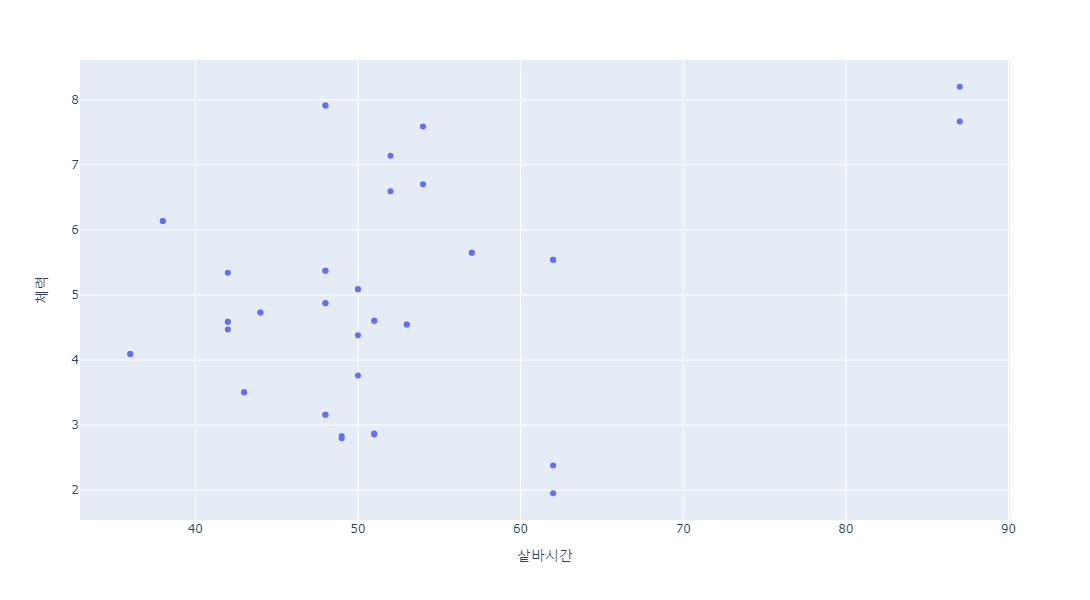

In [19]:
import plotly.express as px

data_plt = {
    '샅바시간': data.satba_time,
    '체력': data.stamina
}

fig = px.scatter(data_plt, x='샅바시간', y='체력')

fig.update_layout(
    width=600, 
    height=600
)

fig.show()

# 이동거리와 체력간의 관계

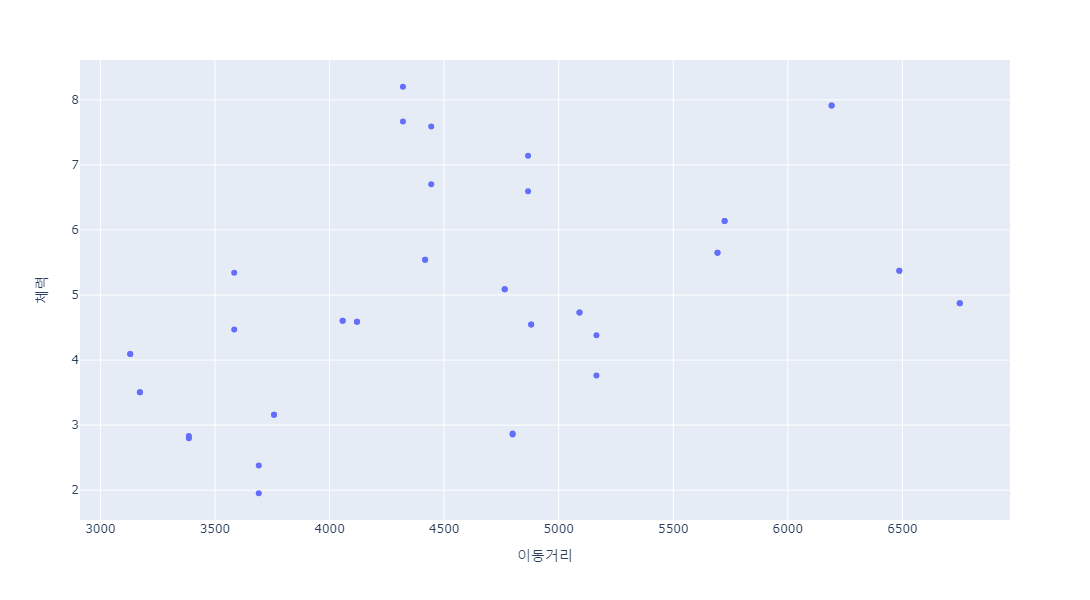

In [20]:
data_plt = {
    '이동거리': data.move,
    '체력': data.stamina
}

fig = px.scatter(data_plt, x='이동거리', y='체력')

fig.update_layout(
    width=600,
    height=600
)

fig.show()

# 체력이 많을 때 승리/패배 비율

In [39]:
pred = pd.read_csv('../Output/한라_predict.csv', encoding = 'cp949')

In [33]:
pred

,file_name,name,height,weight,satba_time,play_time,rest_time,status,skill,move,game_num,round,predict
0,한라_8_1_1_0,이국희,183,106,51,6,0,0,1,4798.979413,1,8,0.475826
1,한라_8_1_1_0,김무호,183,107,51,6,0,1,1,4798.979413,1,8,0.478499
2,한라_8_1_2_0,이국희,183,106,99,12,60,0,2,11549.262830,2,8,1.287950
3,한라_8_1_2_0,김무호,183,107,99,12,60,0,2,11549.262830,2,8,1.290622
4,한라_8_2_1_0,유정훈,190,105,62,3,0,0,1,3691.158295,1,8,0.325533
5,한라_8_2_1_0,최성환,183,107,62,3,0,1,1,3691.158295,1,8,0.396428
6,한라_8_2_2_0,유정훈,190,105,112,9,60,0,4,8455.673135,2,8,1.173440
7,한라_8_2_2_0,최성환,183,107,112,9,60,0,4,8455.673135,2,8,1.244335
8,한라_8_3_1_0,박동환,193,105,50,9,0,0,3,5164.752321,1,8,0.626998
9,한라_8_3_1_0,박민교,182,105,50,9,0,1,3,5164.752321,1,8,0.730005


In [40]:
pred['status'] = pred['status'].astype('object')

In [41]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   file_name   44 non-null     object 
 1   name        44 non-null     object 
 2   height      44 non-null     int64  
 3   weight      44 non-null     int64  
 4   satba_time  44 non-null     int64  
 5   play_time   44 non-null     int64  
 6   rest_time   44 non-null     int64  
 7   status      44 non-null     object 
 8   skill       44 non-null     int64  
 9   move        44 non-null     float64
 10  game_num    44 non-null     int64  
 11  round       44 non-null     int64  
 12  predict     44 non-null     float64
dtypes: float64(2), int64(8), object(3)
memory usage: 4.6+ KB


In [42]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#0054EA','#7EA7F0']
explode = [0.10, 0]
temp_data = (pred.iloc[16:].query('status == "1"').predict.reset_index(drop = True)<pred.iloc[16:].query('status == "0"').predict.reset_index(drop = True)).value_counts()

In [35]:
temp_data

Series([], Name: predict, dtype: int64)

([<matplotlib.patches.Wedge at 0x16512102f70>,
 [Text(-0.7481878124250023, 0.9381977389328381, 'win'),
  Text(0.6858389085766268, -0.8600145298088989, 'lose')],
 [Text(-0.43644289058125135, 0.5472820143774888, '71.4%'),
  Text(0.37409395013270547, -0.4690988344412175, '28.6%')])

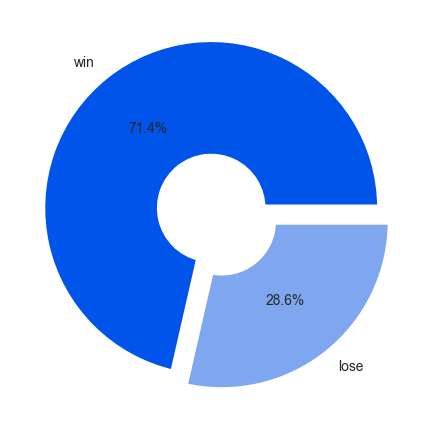

In [30]:
plt.pie(temp_data,labels=['win','lose'], autopct='%.1f%%',colors = colors,explode=explode,wedgeprops=wedgeprops)